<a href="https://colab.research.google.com/github/EddyGiusepe/Pytorch_Deep_Learnig/blob/main/Pytorch_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**Pytorch: Deep Learning**</h2>

**Cientista de Dados Jr:** Eddy Giusepe Chirinos Isidro 


[Primeiros Passos com Pytorch | Deep Learning na prática](https://www.youtube.com/watch?v=pQs7BCkqz9Q).




## Importamos as nossas bibliotecas

In [1]:
import numpy as np
import torch


import matplotlib.pyplot as plt 
%matplotlib inline 



## Download ``MNIST`` Dataset

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])


# Download Dados de treino
trainset = datasets.MNIST('~/.pytorch_data/MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch_data/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
trainloader

## A imagem

Dasse DataLoad em ``Pytorch`` nos ajuda a carregar e iterar sobre elementos em um conjunto de Dados. Esta classe está disponível como DataLoader no módulo torch.utils.data module. Agora nós temos os Dados de treinamento no objeto ``trainloader``. Vamos criar um interator em trainloader para que possamos fazer lopp nos Dados MNIST.


* Batch tamanho 10:
  * Representa o número de imagens que nós vamos utilizar a cada iteração que possamos na nossa ``Rede Neural``.

* Shufle = True:
  * Para embaralhar os Dados.


Vamos dar uma olhada na primeira Batch:  


In [5]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

In [6]:
print('Image type: ', type(images))
print("")
print('image shape:', images.shape)

Image type:  <class 'torch.Tensor'>

image shape: torch.Size([10, 1, 28, 28])


In [7]:
print('Labels shape : ', labels.shape)
print("")
print('Labels :', labels)

Labels shape :  torch.Size([10])

Labels : tensor([7, 9, 1, 6, 8, 4, 5, 1, 0, 2])


Podemos ver que as imagens são tensores com shape [10, 1, 28, 28]. Ou seja, temos aqui $10$ imagens por batch com um ("1") color channel (cinza) e $28$x$28$ pixels por imagem.

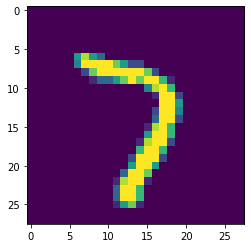

In [8]:
plt.imshow(images[0].numpy().squeeze());

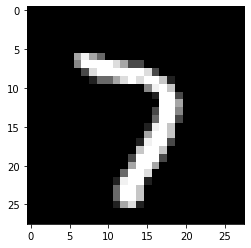

In [9]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

## Criando a Rede Neural 

In [10]:
from torch import nn


class Network(nn.Module):
  def __init__(self):
      super().__init__()
      self.hidden_1 = nn.Linear(784, 128)
      self.hidden_2 = nn.Linear(128, 64)



      self.output = nn.Linear(64, 10)



      self.Relu = nn.ReLU()
      self.LogSoftmax = nn.LogSoftmax(dim=1)


  def forward(self, x):
    x = self.hidden_1(x)
    x = self.Relu(x) 


    x = self.hidden_2(x)
    x = self.Relu(x)



    x = self.output(x)
    x = self.LogSoftmax(x)


    return x




In [11]:
modelo = Network()


modelo

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (Relu): ReLU()
  (LogSoftmax): LogSoftmax(dim=1)
)

In [12]:
images.shape[0]

10

In [13]:
print('image (shape): ', images.shape)
print("")
print('image shape[0]:', images.shape[0])
print("")
print("images.view(images.shape[0], -1).shape: ", images.view(images.shape[0], -1).shape)


image (shape):  torch.Size([10, 1, 28, 28])

image shape[0]: 10

images.view(images.shape[0], -1).shape:  torch.Size([10, 784])


In [14]:
from torch import optim

In [15]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelo.parameters(), lr=0.003)


epocas = 5

for epoca in range(epocas):
  loss_ = 0
  for images, labels in trainloader:
    # Flatten imagem em vetor de 784 elementos
    images = images.view(images.shape[0], -1)



    optimizer.zero_grad()
    output = modelo.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()


    loss_ += loss.item()
  else:
    print(f"Loss Treino: {loss_/len(trainloader)}")  
    


Loss Treino: 0.7349348462199171
Loss Treino: 0.32004657128158337
Loss Treino: 0.26814578657861177
Loss Treino: 0.22828139901479397
Loss Treino: 0.1945404481004613


In [22]:
images, labels = next(iter(trainloader))

In [23]:
#torch.size

img = images[0].view(1, 784)

In [24]:
# Bloqueia o cálculo de gradiente - usado para avaliação

with torch.no_grad():
  logs = modelo(img)

In [25]:
# Outout of the network are log-probabilities, need to take axponential for probabilities

p = torch.exp(logs)

p = p.data.numpy().squeeze()


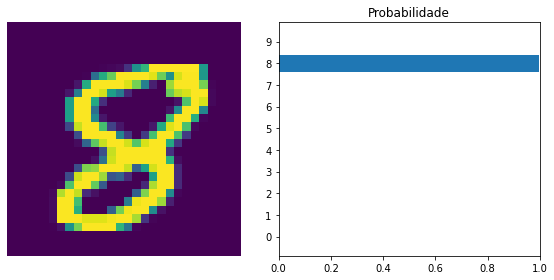

In [26]:
fig, (ax1, ax2) = plt.subplots(figsize = (8, 4), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), p)
ax2.set_yticks(np.arange(10))

ax2.set_yticklabels(np.arange(10))

ax2.set_title('Probabilidade')
ax2.set_xlim(0, 1, 1)


plt.tight_layout()

## Uma outra forma